# **Predict Employee Attrition: Transform**

## Objectives

* At the end of this phase, we will:
    - Transform the dataset to analyze it in more detail
    - Conduct statistical tests to determine and establish relationships between features
    - Create a dashaboard that enables better exploration

## Inputs

* [Task outline](https://docs.google.com/document/d/e/2PACX-1vThNllbMORJoc348kFavz4mZWT1-33xyazdD2L-3AlTfORlRhuDyT0xmCBQMD2C-K2djQQipt6te6lo/pub)
* Extract phase

## Outputs

* Transform the dataset
* Statitical tests and visualizations
* PowerBI Dashboard

---

# Import packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pingouin as pg

---

# Data reupload

In [3]:
df = pd.read_csv("../data/cleaned_data/predict_employee_attrition_copy.csv")
print(df.shape)
df.head()

(1470, 32)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


---

# Data transformation

Aggregating satisfaction levels

In [4]:
# Create TotalSatisfaction feature by averaging satisfaction scores
satisfaction_cols = ["JobSatisfaction", "EnvironmentSatisfaction", "RelationshipSatisfaction", "WorkLifeBalance"]
df["TotalSatisfaction"] = df[satisfaction_cols].mean(axis=1)
print(df[["TotalSatisfaction"] + satisfaction_cols].head())

   TotalSatisfaction  JobSatisfaction  EnvironmentSatisfaction  \
0               2.00                4                        2   
1               3.00                2                        3   
2               3.00                3                        4   
3               3.25                3                        4   
4               2.50                2                        1   

   RelationshipSatisfaction  WorkLifeBalance  
0                         1                1  
1                         4                3  
2                         2                3  
3                         3                3  
4                         4                3  


Creating age groups

In [5]:
print(df["Age"].nunique())
print("---" * 40)
print(df["Age"].unique())
print("---" * 40)
print(f"Min age: ", df["Age"].min())
print("---" * 40)
print(f"Max age: ", df["Age"].max())

43
------------------------------------------------------------------------------------------------------------------------
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
------------------------------------------------------------------------------------------------------------------------
Min age:  18
------------------------------------------------------------------------------------------------------------------------
Max age:  60


In [6]:
# Define age brackets
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']

# Create AgeBracket column
df['AgeBracket'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Display the distribution of age brackets
print(df['AgeBracket'].value_counts())
print(df[['Age', 'AgeBracket']].head())

AgeBracket
26-35    606
36-45    468
46-55    226
18-25    123
56-65     47
Name: count, dtype: int64
   Age AgeBracket
0   41      36-45
1   49      46-55
2   37      36-45
3   33      26-35
4   27      26-35


encoding attrition and gender

In [7]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [8]:
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

## Sanity check: Post-transformation

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   int64   
 2   BusinessTravel            1470 non-null   object  
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   object  
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   object  
 8   EmployeeNumber            1470 non-null   int64   
 9   EnvironmentSatisfaction   1470 non-null   int64   
 10  Gender                    1470 non-null   int64   
 11  HourlyRate                1470 non-null   int64   
 12  JobInvolvement            1470 non-null   int64   
 13  JobLevel                  1470 non-null   int64 

In [10]:
(df == 0).sum()

Age                            0
Attrition                   1233
BusinessTravel                 0
DailyRate                      0
Department                     0
DistanceFromHome               0
Education                      0
EducationField                 0
EmployeeNumber                 0
EnvironmentSatisfaction        0
Gender                       588
HourlyRate                     0
JobInvolvement                 0
JobLevel                       0
JobRole                        0
JobSatisfaction                0
MaritalStatus                  0
MonthlyIncome                  0
MonthlyRate                    0
NumCompaniesWorked           197
OverTime                       0
PercentSalaryHike              0
PerformanceRating              0
RelationshipSatisfaction       0
StockOptionLevel             631
TotalWorkingYears             11
TrainingTimesLastYear         54
WorkLifeBalance                0
YearsAtCompany                44
YearsInCurrentRole           244
YearsSince

In [11]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
TotalSatisfaction           0
AgeBracket

---

# Correlation Analysis

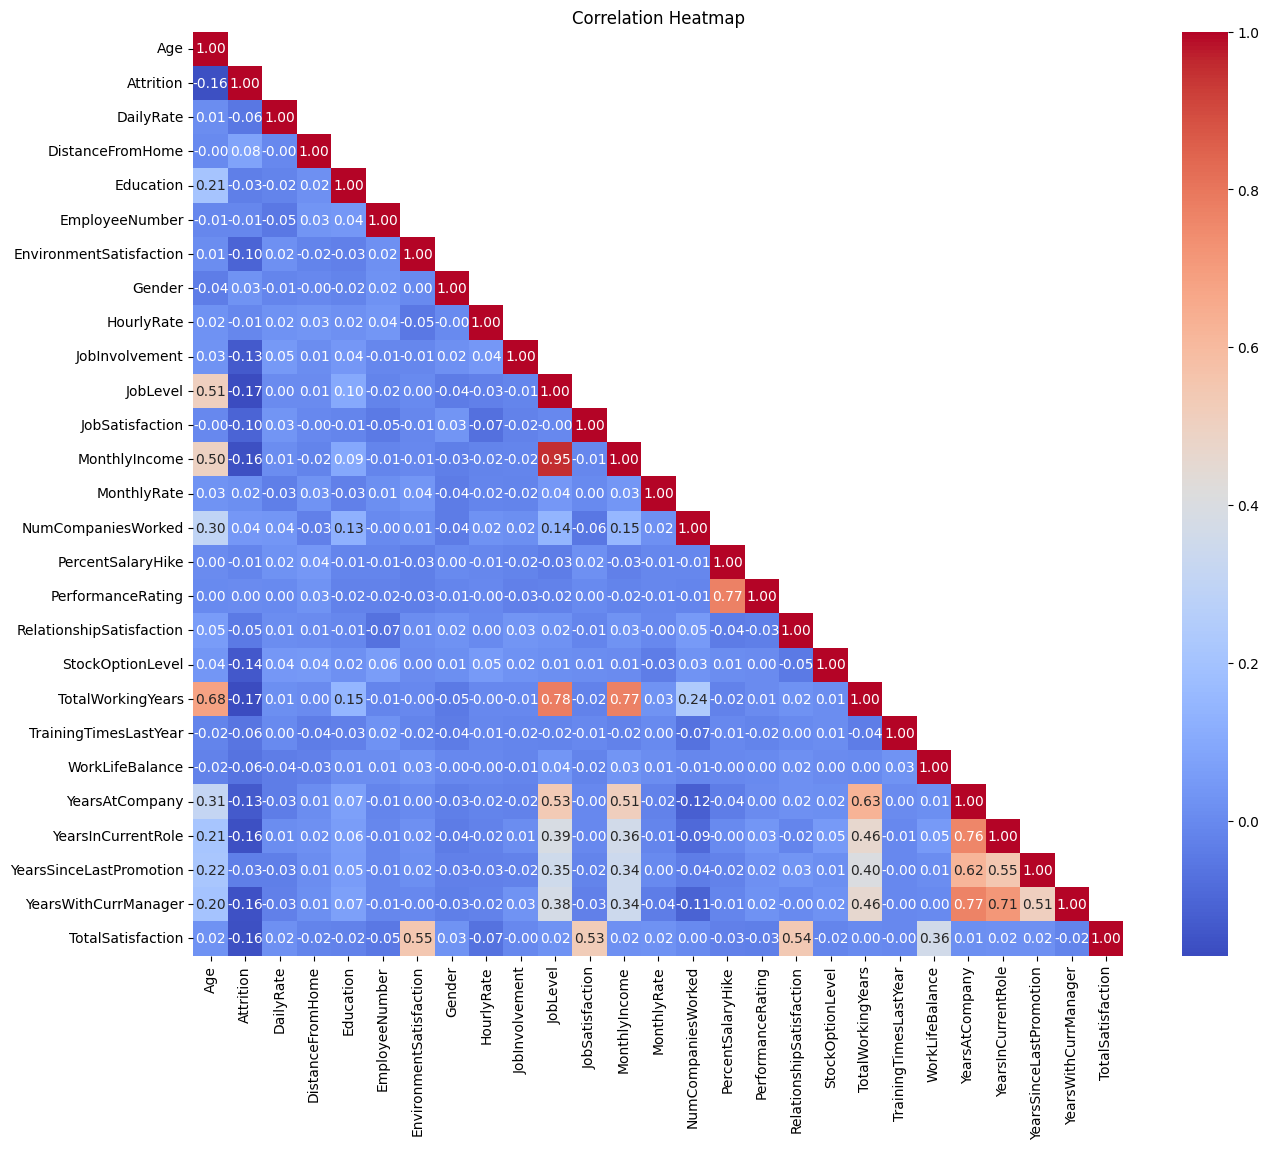

In [12]:
plt.figure(figsize=(15, 12))
mask = np.triu(np.ones_like(df.select_dtypes(include='number').corr(), dtype=bool), k=1)
sns.heatmap(df.select_dtypes(include='number').corr(), mask=mask, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Correlation analysis:**
The correlation analysis following transfomration has not revealed any new linear correlations. We will now progress with hypothesis testing and check if there are any statistically significant relationships between features.


In [13]:
pd.crosstab(df['Attrition'], df['Gender'], normalize='columns')

Gender,0,1
Attrition,,
0,0.852041,0.829932
1,0.147959,0.170068


In [14]:
df = df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'], errors='ignore') #dropping columns that do not add value to the analysis
print(df.shape)
df.head(10)

(1470, 34)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalSatisfaction,AgeBracket
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,0,8,0,1,6,4,0,5,2.00,36-45
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,1,10,3,3,10,7,1,7,3.00,46-55
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,0,7,3,3,0,0,0,0,3.00,36-45
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,0,8,3,3,8,7,3,0,3.25,26-35
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,1,6,3,3,2,2,2,2,2.50,26-35
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,8,4,...,0,8,2,2,7,7,3,6,3.25,26-35
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,10,3,...,3,12,3,2,1,0,0,0,1.75,56-65
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,11,4,...,1,1,2,3,1,0,0,0,3.00,26-35
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,12,4,...,0,10,2,3,9,7,1,8,3.00,36-45
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,13,3,...,2,17,3,2,7,7,7,7,2.50,36-45


# Copy dataset

In [15]:
df.to_csv("../data/transformed_data/predict_employee_attrition_transformed.csv", index=False)

---

# Research methodology

Testing hypotheses to determine the relationship between features

## Hypothesis 4: Monthly Income and Attrition Rate

Null hypothesis: Monthly income and attrition rate are independent of each other and do not share a statistically significant relationship.

In [16]:
pg.mwu(df['MonthlyIncome'], df['Attrition'], alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,2160900.0,two-sided,0.0,1.0,1.0


**Key observations:** 
* The p-value score is 0, which means we have enough evidence to reject the null hypothesis. In the synthetic dataset, MonthlyIncome and Attrition share a statistically significant relationship.

In [25]:
fig = px.box(df, x='Attrition', y='MonthlyIncome', color='Attrition',
             title='Monthly Income vs Attrition',
             labels={'MonthlyIncome': 'Monthly Income', 'Attrition': 'Attrition Status'})
fig.show()

**Key observations:**
* Employees who left the company (Attrition = 1) generally have lower monthly incomes compared to those who stayed (Attrition = 0).
* The boxplot and distribution plots show a clear separation in income levels between the two groups.
* The Mann-Whitney U test result indicates a statistically significant difference in monthly income between employees who left and those who stayed (p-value ≈ 0).
* This suggests that lower monthly income is strongly associated with higher attrition rates.
* Addressing income disparities may help reduce employee attrition and improve retention.

**Business impact:**
* The strong link between lower monthly income and higher attrition rates highlights the importance of competitive compensation strategies.
* Organizations can reduce employee turnover by reviewing and adjusting salary structures, especially for roles with higher attrition.
* Improving pay equity and transparency may enhance employee satisfaction and retention.
* Addressing income disparities can lead to cost savings by reducing recruitment and training expenses associated with high attrition.
* Strategic compensation planning supports a more stable, motivated, and productive workforce.

---

# Summary